In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import requests

# pd.options.display.mpl_style = 'default'
plt.rcParams['figure.figsize'] = (8, 8)

## Getting the data

In [2]:
df = pd.DataFrame.from_csv("professors.csv", encoding='utf-8')

In [3]:
df

,Name,Start,Years Active,Year,Current_Citations,Age,Last_citations,Last2_citations
0,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2003,3,0,NaN,NaN
1,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2004,23,1,3,NaN
2,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2005,12,2,23,3
3,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2006,38,3,12,23
4,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2007,49,4,38,12
5,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2008,43,5,49,38
6,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2009,23,6,43,49
7,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2010,63,7,23,43
8,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2011,37,8,63,23
9,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2012,87,9,37,63


## Analyzing the Researchers in the Data

In [4]:
profs = df.drop_duplicates(subset=['Name', 'Start', 'Years Active'])
len(profs)

2861

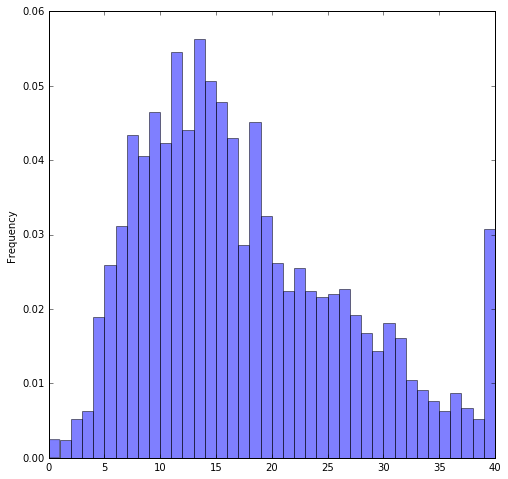

In [5]:
profs["Years Active"].plot(kind='hist', alpha=0.5, bins=40, range=(0,40), normed=True)

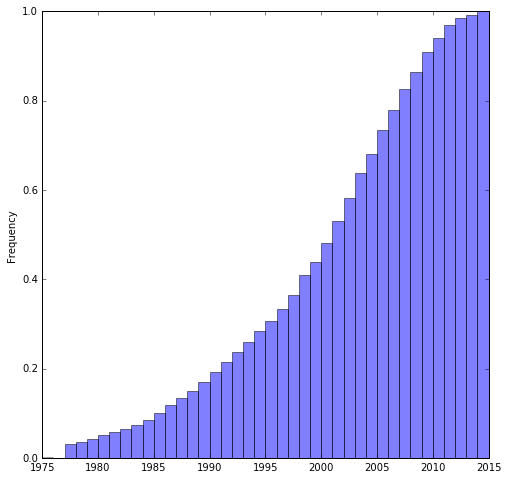

In [6]:
profs["Start"].plot(kind='hist', alpha=0.5, bins=40, normed=True, range=(1975,2015), cumulative=True)

## Exploratory plots on Citations per Year

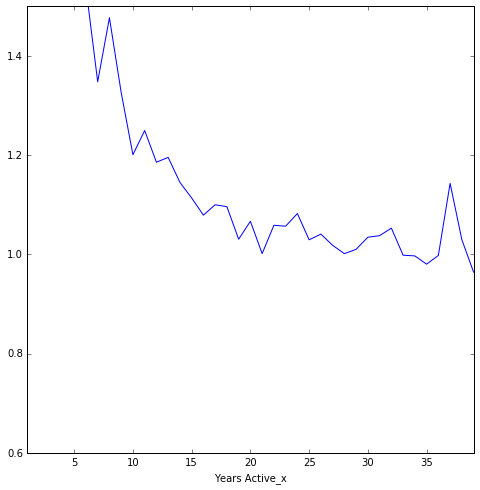

In [7]:
cit2014 = df[['Years Active','Name',"Current_Citations"]][df["Year"]==2014]
cit2015 = df[['Years Active','Name',"Current_Citations"]][df["Year"]==2015]
comparison = pd.merge(cit2014, cit2015, how='inner', left_on ='Name', right_on='Name', sort=True, copy=True, indicator=False,)
comparison["yoy"] = comparison["Current_Citations_y"]/comparison["Current_Citations_x"]
grouped = comparison.groupby("Years Active_x")
grouped.mean()["yoy"].plot(ylim=(0.6,1.5))

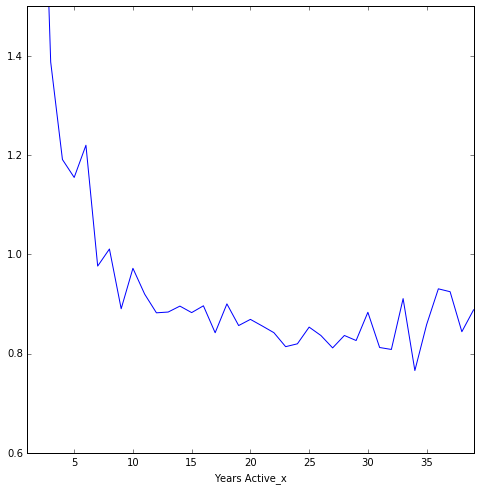

In [8]:
cit2015 = df[['Years Active','Name',"Current_Citations"]][df["Year"]==2015]
cit2016 = df[['Years Active','Name',"Current_Citations"]][df["Year"]==2016]
comparison = pd.merge(cit2015, cit2016, how='inner', left_on ='Name', right_on='Name', sort=True, copy=True, indicator=False,)
comparison["yoy"] = comparison["Current_Citations_y"]/comparison["Current_Citations_x"]
grouped = comparison.groupby("Years Active_x")
grouped.mean()["yoy"].plot(ylim=(0.6,1.5))

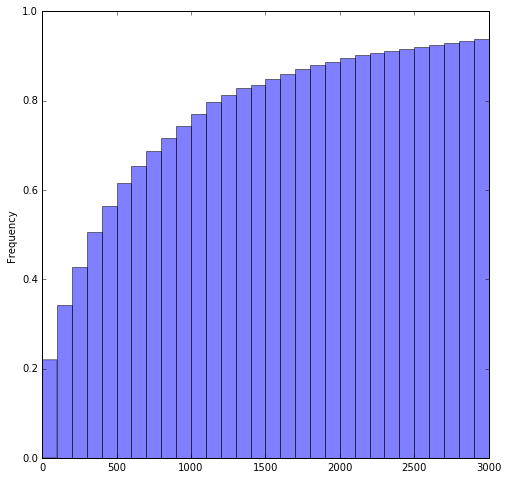

In [9]:
df["Current_Citations"][df["Year"]==2015].plot(kind='hist', alpha=0.5, bins=1000, xlim=(0,3000), ylim=(0,1), range=(0,100000), normed=True, cumulative=True)


In [10]:
# df["Current_Citations"][df["Year"]==2014].plot(kind='hist', alpha=0.5, bins=50, xlim=(0,3000), range=(0,3000), normed=True)


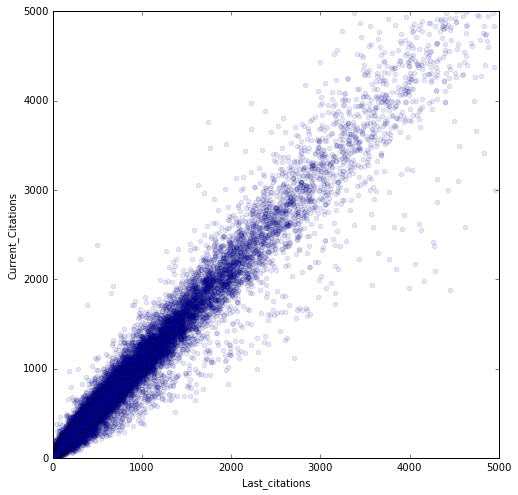

In [11]:
# Let's do a scatterplot 
df.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,5000), ylim=(0,5000), alpha=0.1)

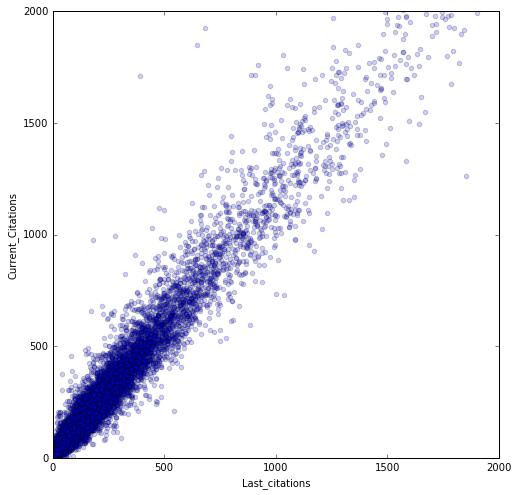

In [12]:
# Let's do a scatterplot for younger scientists
df[df['Age'] < 10].plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,2000), ylim=(0,2000), alpha=0.2)

In [13]:
# This is a simple OLS regression. We are trying to predict "Current_Citations" from "Last Citations"
import statsmodels.formula.api as sm
result = sm.ols(formula="Current_Citations ~ Last_citations", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Current_Citations   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.791e+06
Date:                Thu, 10 Mar 2016   Prob (F-statistic):               0.00
Time:                        21:51:28   Log-Likelihood:            -3.2477e+05
No. Observations:               48374   AIC:                         6.495e+05
Df Residuals:                   48372   BIC:                         6.496e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         28.1291      0.996     28.243      0.000        26.177    30.081
Last_citations     1.0311      0.001   1338.164      0.000         1.030     1.033
==============================================================================
Omnibus:                    72255.503   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        257235124.322
Skew:                          -8.381   Prob(JB):                         0.00
Kurtosis:                     359.850   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

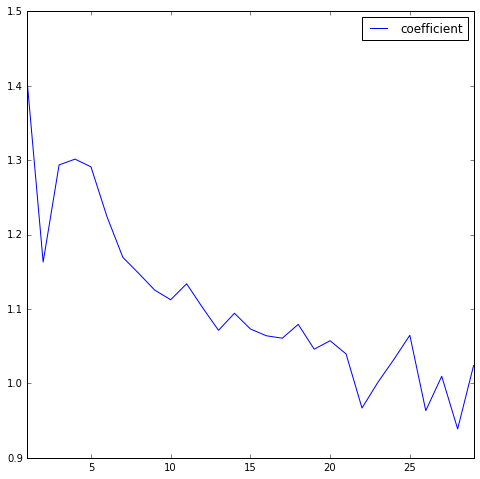

In [14]:
# Now we see the coefficient for different ages
import statsmodels.formula.api as sm

coef_tuples =[]
for age in range(1,30):
    result = sm.ols(formula="Current_Citations ~ Last_citations", data=df[df['Age'] == age]).fit()
    coef_tuples.append(result.params.get('Last_citations'))

cdf = pd.DataFrame(coef_tuples, columns=['coefficient'], index=range(1,30))
cdf.plot()

## Exploratory Data Analysis for 'Citation Growth'

In [15]:
# Apparently, there is a strong autocorrelation between current year and last year citation. Let's 
# create a Growth variable for predicting growth of citations
df["Current_Growth"] = map(lambda x,y: x-y, df["Current_Citations"],  df["Last_citations"])
df["Last_Growth"] = map(lambda x,y: x-y, df["Last_citations"],  df["Last2_citations"])


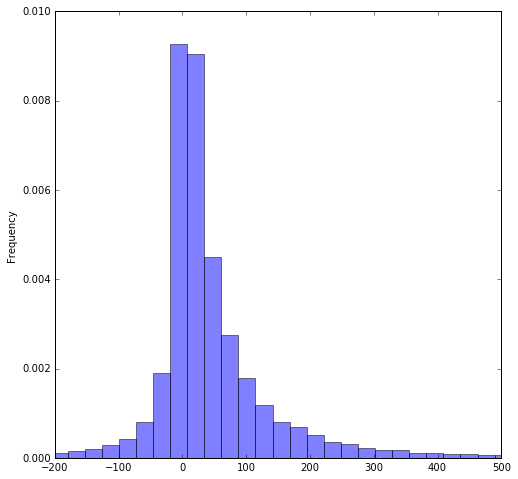

In [16]:
# Let's take a look at the distribution of the Growth variable
# df["Current_Growth"].plot(kind='hist', alpha=0.5, cumulative=True, bins=500, xlim=(-200,500), ylim=(0,1),normed=True)
df["Current_Growth"].plot(kind='hist', alpha=0.5, bins=500, xlim=(-200,500), normed=True)


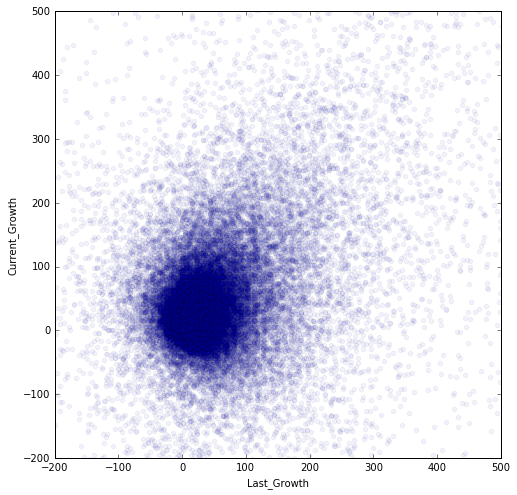

In [17]:
df.plot(kind='scatter', x='Last_Growth', y='Current_Growth', xlim=(-200,500), ylim=(-200,500), alpha=0.05)

In [18]:
# This is a simple OLS regression. We are trying to predict "Current_Citations" from "Last Citations"
result = sm.ols(formula="Current_Growth ~ Last_Growth + Age", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Current_Growth   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     5907.
Date:                Thu, 10 Mar 2016   Prob (F-statistic):               0.00
Time:                        21:51:32   Log-Likelihood:            -3.0202e+05
No. Observations:               45461   AIC:                         6.040e+05
Df Residuals:                   45458   BIC:                         6.041e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      30.1723      1.580     19.099      0.000        27.076    33.269
Last_Growth     0.6265      0.006    108.524      0.000         0.615     0.638
Age            -1.5517      0.107    -14.478      0.000        -1.762    -1.342
==============================================================================
Omnibus:                    71993.714   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        198490866.620
Skew:                          -9.638   Prob(JB):                         0.00
Kurtosis:                     326.136   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Data Analysis for 'Relative Citation Growth'

In [19]:
# and relative growth...
df["Last_Growth_Relative"] = map(lambda x,y: 1.0*x/y if y>0 and y!=None else None, df["Last_Growth"],  df["Last2_citations"])
df["Current_Growth_Relative"] = map(lambda x,y: 1.0*x/y if y>0 and y!=None else None, df["Current_Growth"],  df["Last_citations"])


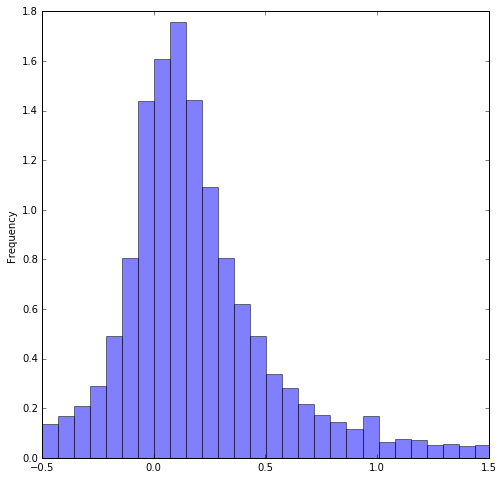

In [20]:
# Let's take a look at the distribution of the RelGrowth variable
# df["Current_Growth_Relative"].plot(kind='hist', alpha=0.5, cumulative=True,bins=500, xlim=(-0.5,1.5), ylim=(0,1), normed=True)
df["Current_Growth_Relative"].plot(kind='hist', alpha=0.5, bins=500, xlim=(-0.5,1.5), normed=True)

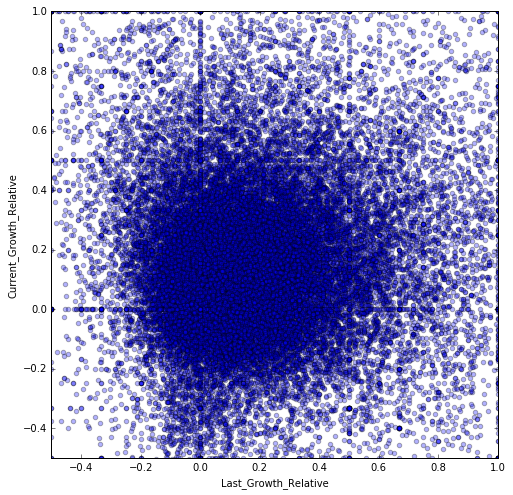

In [21]:
df.plot(kind='scatter', x='Last_Growth_Relative', y='Current_Growth_Relative', xlim=(-0.5,1), ylim=(-0.5,1), alpha=0.3)

In [22]:
sns.jointplot(x="Current_Growth_Relative", y="Last_Growth_Relative", data=df, kind="reg");

NameError: name 'sns' is not defined

In [ ]:
# This is a simple OLS regression. We are trying to predict "Current_Citations" from "Last Citations"
result = sm.ols(formula="Current_Growth_Relative ~ Last_Growth_Relative + Age", data=df).fit()
result.summary()